# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") 

In [2]:
from sklearn import datasets
#from sklearn.preprocessing import StandardScaler

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])

#X = StandardScaler().fit_transform(X)
y = pd.Series(data["target"])

X.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
kmeans = KMeans(n_clusters=8, random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [5]:
#Calcular el coeficiente de silueta para evaluar el modelo
silhouette_avg = silhouette_score(X, y_kmeans)
silhouette_avg

0.5406824747857603

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [6]:
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [7]:
#Calcular el coeficiente de silueta para evaluar el modelo
silhouette_avg = silhouette_score(X, y_kmeans)
silhouette_avg

0.5489993239795675

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [8]:
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [9]:
#Calcular el coeficiente de silueta para evaluar el modelo
silhouette_avg = silhouette_score(X, y_kmeans)
silhouette_avg

0.5711381937868838

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

In [10]:
#%pip install yellowbrick

In [11]:
from yellowbrick.cluster import KElbowVisualizer

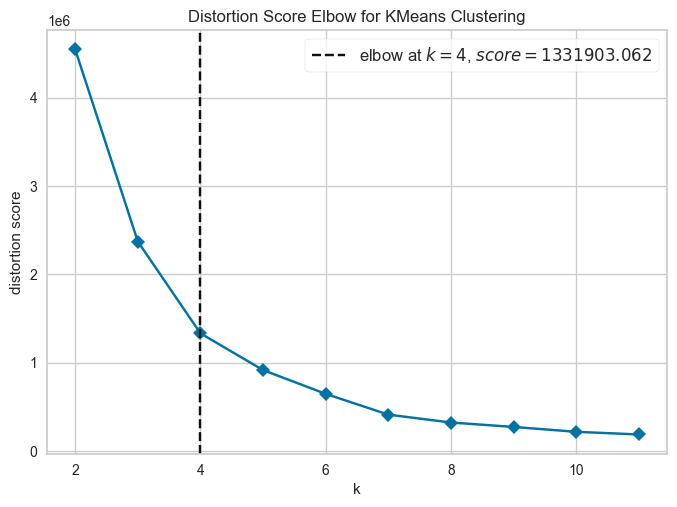

In [12]:
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 12), 
                              metric='distortion', 
                              timings=False)

visualizer.fit(X)
visualizer.show();

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

In [13]:
from sklearn.cluster import AgglomerativeClustering

In [14]:
model = AgglomerativeClustering()

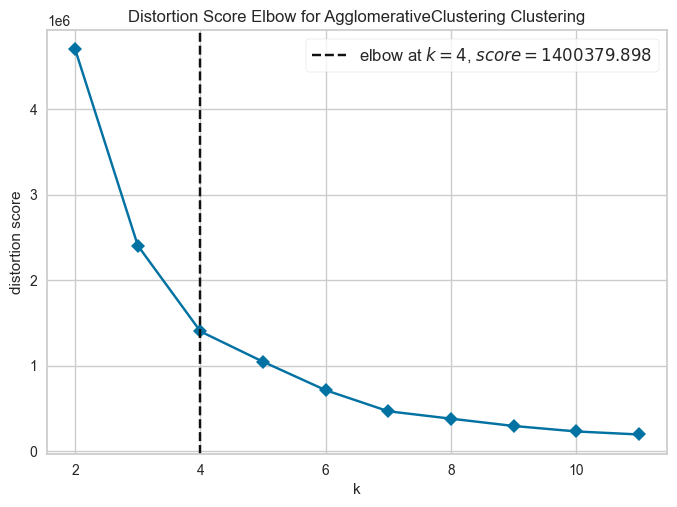

In [15]:
visualizer = KElbowVisualizer(model, 
                              k=(2, 12), 
                              metric='distortion', 
                              timings=False)

visualizer.fit(X)
visualizer.show();

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [27]:
from sklearn.preprocessing import StandardScaler
from yellowbrick.features import ParallelCoordinates
import seaborn as sns

In [33]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, 
                random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [34]:
X_clustered = X.copy()
X_clustered['Cluster'] = y_kmeans

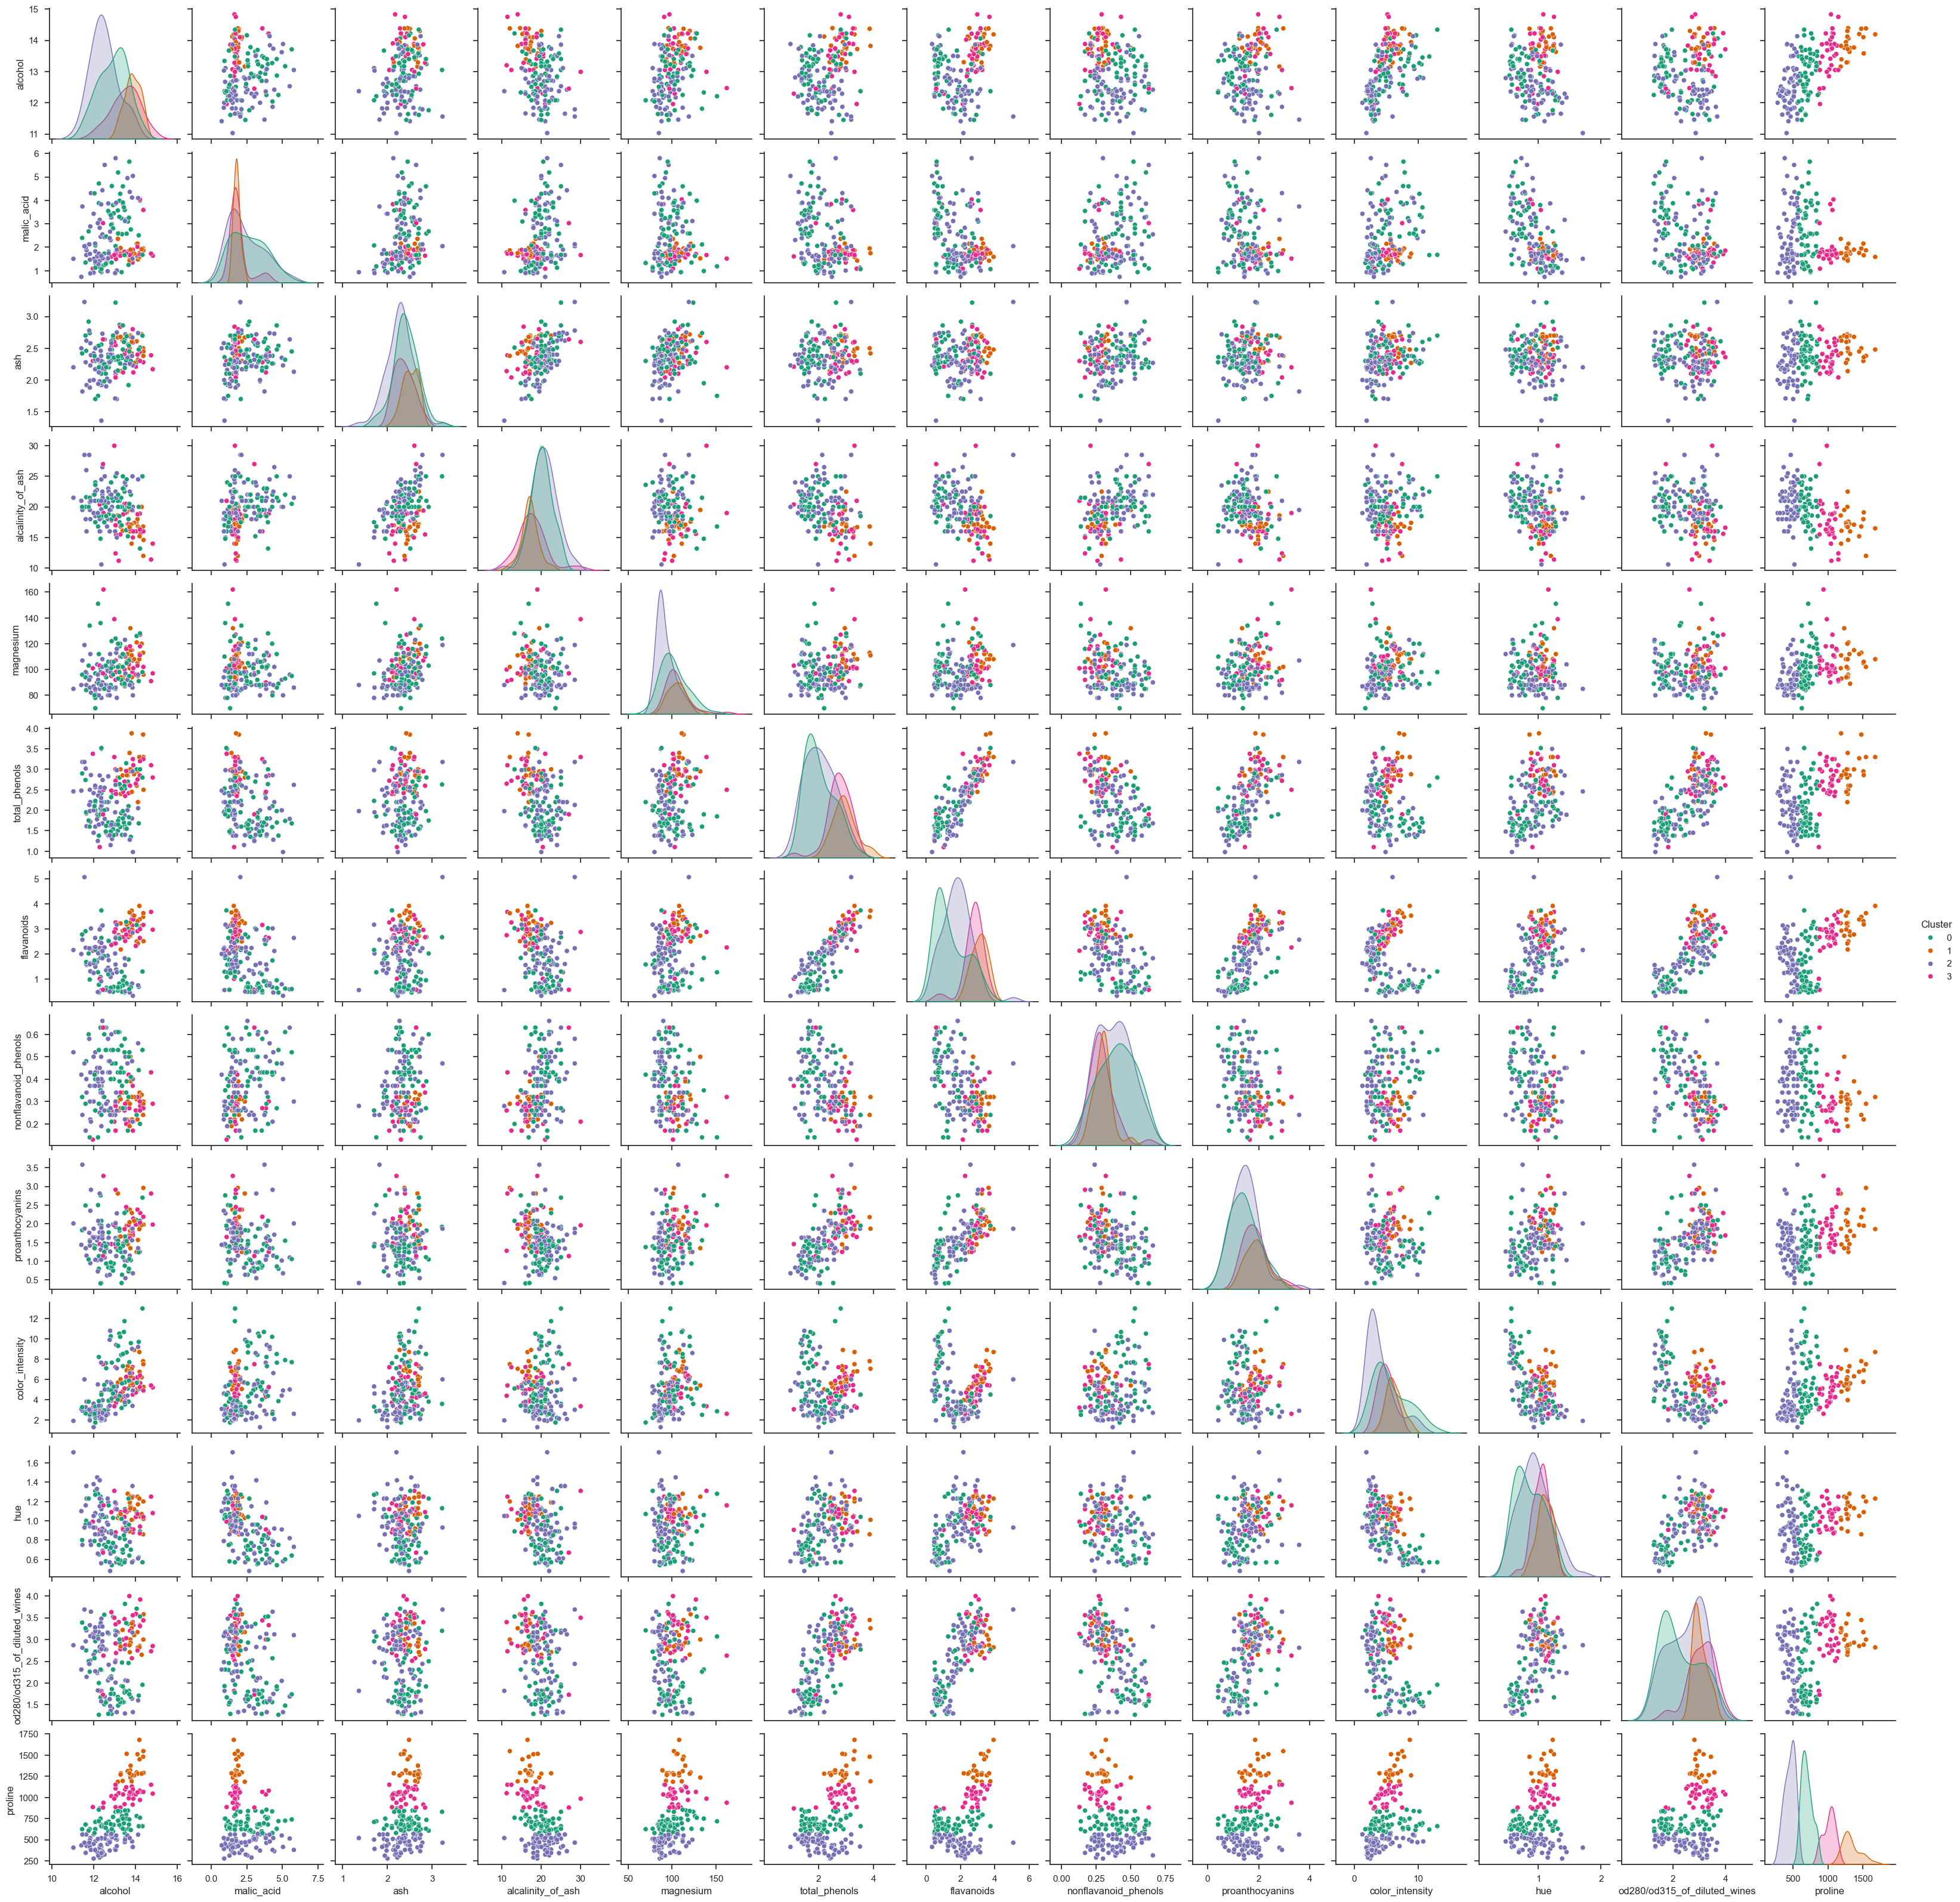

In [36]:
sns.set(style="ticks")
sns.pairplot(X_clustered, hue='Cluster', palette='Dark2')
plt.show();

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [38]:
from sklearn.decomposition import PCA

In [39]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [40]:
pca_df = pd.DataFrame(data=X_pca, 
                      columns=['Principal Component 1', 
                               'Principal Component 2'])
pca_df['Cluster'] = y_kmeans

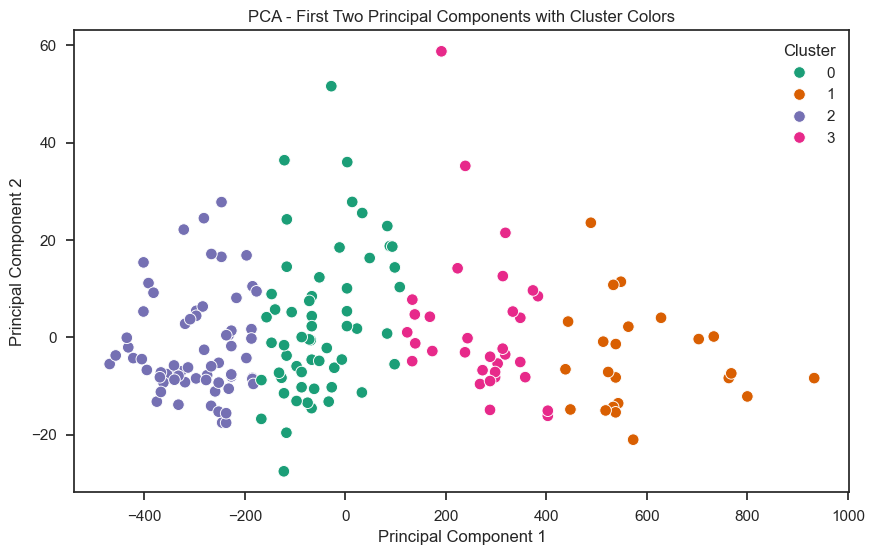

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Principal Component 1',
                y='Principal Component 2', 
                hue='Cluster', data=pca_df, 
                palette='Dark2', s=70)
plt.title('PCA - First Two Principal Components with Cluster Colors')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show();

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

In [42]:
from sklearn.manifold import TSNE

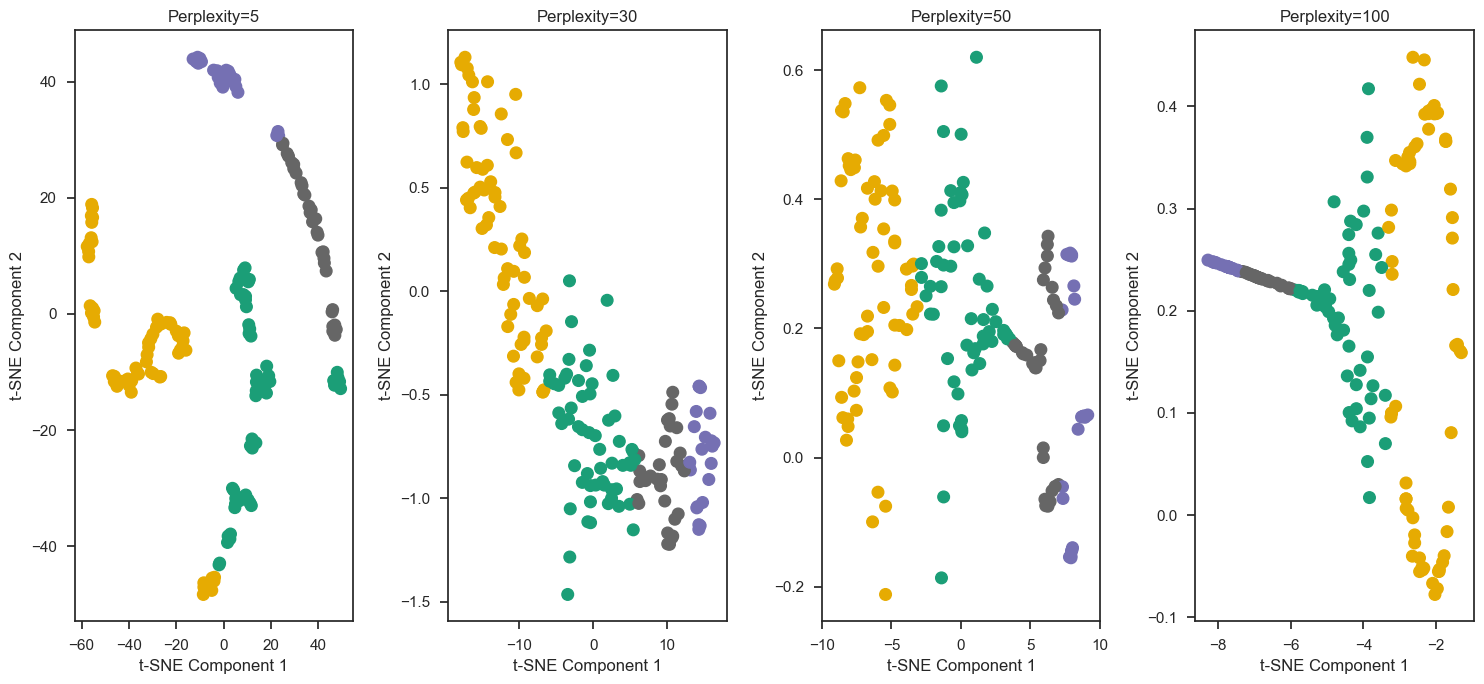

In [46]:
perplexities = [5, 30, 50, 100]

fig, ax = plt.subplots(1, 4, figsize=(15, 7))

for i, perplexity in enumerate(perplexities):
    tsne = TSNE(perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X)

    
    ax[i].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_kmeans, cmap='Dark2', s=70)
    ax[i].set_title(f'Perplexity={perplexity}')
    ax[i].set_xlabel('t-SNE Component 1')
    ax[i].set_ylabel('t-SNE Component 2')

plt.tight_layout()
plt.show();